<a href="https://colab.research.google.com/github/taraponglab/Skin_Irritation_CT/blob/main/projectpubchem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


load finger print and class

In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/taraponglab/Skin_Irritation_CT/main/dataset/processed/curated_datahacat.csv")
df

,LigandID,canonical_smiles,class
0,CHEMBL4794117,C=C1c2cc3c(cc2OC1(F)F)[C@@H](NC(C)=O)CCc1cc(OC...,1
1,CHEMBL4800456,C=C1COc2cc3c(cc21)-c1c(cc(OC)c(OC)c1OC)CC[C@@H...,1
2,CHEMBL4753994,COc1cc2c(c(OC)c1OC)-c1cc3c(C)coc3cc1[C@@H](NC(...,1
3,CHEMBL4797732,C/C=C/C=C/C(=O)OCC(=O)N[C@H]1CCc2cc(OC)c(OC)c(...,1
4,CHEMBL4743585,C/C=C/C=C/C(=O)OCC(=O)N[C@H]1CCc2cc(OC)c(OC)c(...,1
...,...,...,...
464,CHEMBL4549879,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)N1CCN(c2cc3c(cc...,0
465,CHEMBL4591601,COc1ccc(/C=C2\NC(=O)N(CCCCN3CCN(c4cccc(Cl)c4Cl...,0
466,CHEMBL4067470,NS(=O)(=O)c1cc(-c2nnc(Cn3cc(-c4ccccc4)nn3)o2)c...,0
467,CHEMBL146816,COC(=O)/C=C/c1ccc(O)cc1,0


In [27]:
#import file จาก github
df_pubchem = pd.read_csv("https://raw.githubusercontent.com/taraponglab/Skin_Irritation_CT/main/figerprintspubchem.csv")
df_pubchem

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,AUTOGEN_smilespubchem_1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AUTOGEN_smilespubchem_2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AUTOGEN_smilespubchem_3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AUTOGEN_smilespubchem_4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AUTOGEN_smilespubchem_5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,AUTOGEN_smilespubchem_465,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
465,AUTOGEN_smilespubchem_466,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466,AUTOGEN_smilespubchem_467,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
467,AUTOGEN_smilespubchem_468,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df = df.set_index(df['LigandID'])
df

,LigandID,canonical_smiles,class
LigandID,,,
CHEMBL4794117,CHEMBL4794117,C=C1c2cc3c(cc2OC1(F)F)[C@@H](NC(C)=O)CCc1cc(OC...,1
CHEMBL4800456,CHEMBL4800456,C=C1COc2cc3c(cc21)-c1c(cc(OC)c(OC)c1OC)CC[C@@H...,1
CHEMBL4753994,CHEMBL4753994,COc1cc2c(c(OC)c1OC)-c1cc3c(C)coc3cc1[C@@H](NC(...,1
CHEMBL4797732,CHEMBL4797732,C/C=C/C=C/C(=O)OCC(=O)N[C@H]1CCc2cc(OC)c(OC)c(...,1
CHEMBL4743585,CHEMBL4743585,C/C=C/C=C/C(=O)OCC(=O)N[C@H]1CCc2cc(OC)c(OC)c(...,1
...,...,...,...
CHEMBL4549879,CHEMBL4549879,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)N1CCN(c2cc3c(cc...,0
CHEMBL4591601,CHEMBL4591601,COc1ccc(/C=C2\NC(=O)N(CCCCN3CCN(c4cccc(Cl)c4Cl...,0
CHEMBL4067470,CHEMBL4067470,NS(=O)(=O)c1cc(-c2nnc(Cn3cc(-c4ccccc4)nn3)o2)c...,0


In [29]:
df = df.drop(['LigandID'], axis=1)
df

,canonical_smiles,class
LigandID,,
CHEMBL4794117,C=C1c2cc3c(cc2OC1(F)F)[C@@H](NC(C)=O)CCc1cc(OC...,1
CHEMBL4800456,C=C1COc2cc3c(cc21)-c1c(cc(OC)c(OC)c1OC)CC[C@@H...,1
CHEMBL4753994,COc1cc2c(c(OC)c1OC)-c1cc3c(C)coc3cc1[C@@H](NC(...,1
CHEMBL4797732,C/C=C/C=C/C(=O)OCC(=O)N[C@H]1CCc2cc(OC)c(OC)c(...,1
CHEMBL4743585,C/C=C/C=C/C(=O)OCC(=O)N[C@H]1CCc2cc(OC)c(OC)c(...,1
...,...,...
CHEMBL4549879,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)N1CCN(c2cc3c(cc...,0
CHEMBL4591601,COc1ccc(/C=C2\NC(=O)N(CCCCN3CCN(c4cccc(Cl)c4Cl...,0
CHEMBL4067470,NS(=O)(=O)c1cc(-c2nnc(Cn3cc(-c4ccccc4)nn3)o2)c...,0


In [30]:
#เชื่อม index และ class
#drop name
df_pubchem = df_pubchem.set_index(df.index)
df_pubchem = df_pubchem.drop(["Name"], axis=1)
df_pubchem = pd.concat([df['class'], df_pubchem], axis=1)
df_pubchem


,class,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
LigandID,,,,,,,,,,,,,,,,,,,,,
CHEMBL4794117,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4800456,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4753994,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4797732,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4743585,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL4549879,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4591601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4067470,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df_punchem.to_csv('/content/drive/MyDrive/project/pubchem_class_hacat.csv')

Define x and y - Split train test

In [32]:
#load
from sklearn.model_selection import train_test_split
x = df_pubchem.drop(['class'], axis=1)
y = df_pubchem['class']
#Split 70-30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print("Number of melecules in Train: ", len(x_train))
print("Number of melecules in Test: ", len(x_test))


Number of melecules in Train:  328
Number of melecules in Test:  141


In [35]:
def remove_constant_string_des(df):
    #delete string value
    df = df.select_dtypes(exclude=['object'])
    #delete constant value
    for column in df.columns:
        if df[column].nunique() == 1:  # This checks if the column has only one unique value
            df = df.drop(column, axis=1)  # This drops the column from the DataFrame
    return df

In [36]:
def remove_highly_correlated_features(df, threshold=0.7):
    # Compute pairwise correlation of columns
    corr_matrix = df.corr().abs()
    # Create a mask for the upper triangle
    upper = corr_matrix.where(
        pd.DataFrame(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool),
                     index=corr_matrix.index, columns=corr_matrix.columns)
    )
    # Identify columns to drop based on threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    # Drop the columns from the DataFrame
    df_dropped = df.drop(columns=to_drop)
    return df_dropped

In [37]:
#ลบค่าคงที่
x_train_reduce = remove_constant_string_des(x_train)
#ลบตัวแปรที่มีค่าความสัมพันธ์สูง
x_train_reduce = remove_highly_correlated_features(x_train_reduce, threshold=0.7)
x_train_reduce

,PubchemFP0,PubchemFP2,PubchemFP3,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,...,PubchemFP750,PubchemFP751,PubchemFP756,PubchemFP757,PubchemFP758,PubchemFP762,PubchemFP763,PubchemFP769,PubchemFP776,PubchemFP839
LigandID,,,,,,,,,,,,,,,,,,,,,
CHEMBL4095195,1,1,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL3823611,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4751656,1,0,0,1,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
CHEMBL4083138,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
CHEMBL4289758,1,0,0,1,1,1,1,1,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL4103110,1,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4762039,1,1,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4067412,1,1,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#ลดตัวแปร test ให้เหมือน train
x_test_reduce = x_test[x_train_reduce.columns]
x_test_reduce

,PubchemFP0,PubchemFP2,PubchemFP3,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,...,PubchemFP750,PubchemFP751,PubchemFP756,PubchemFP757,PubchemFP758,PubchemFP762,PubchemFP763,PubchemFP769,PubchemFP776,PubchemFP839
LigandID,,,,,,,,,,,,,,,,,,,,,
CHEMBL1580883,1,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4084996,1,0,0,1,1,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
CHEMBL3613550,1,1,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4173641,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL465843,1,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL4789567,0,0,0,1,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
CHEMBL4785310,1,1,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL1824864,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Random forest

In [53]:
from numpy.lib.shape_base import column_stack
#โหลด package
from zmq import PROBE_ROUTER
# ensemble คือหาค่าเฉลี่ย
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
#model construction
model = RandomForestClassifier(n_estimators=100, random_state=1).fit(x_train_reduce, y_train)
#make preduction
y_train_pred = model.predict(x_train_reduce)
y_cv_pred = cross_val_predict(model, x_train_reduce, y_train, cv=5)
y_test_pred  = model.predict(x_test_reduce)
#check accuracy, sens, spec, precision
#cal acc
acc_tr = accuracy_score(y_train, y_train_pred)
acc_cv = accuracy_score(y_train, y_cv_pred)
acc_te = accuracy_score(y_test, y_test_pred)
#cal precision
pre_tr = precision_score(y_train, y_train_pred)
pre_cv = precision_score(y_train, y_cv_pred)
pre_te = precision_score(y_test, y_test_pred)
#cal sens(recall)
sen_tr = recall_score(y_train, y_train_pred)
sen_cv = recall_score(y_train, y_cv_pred)
sen_te = recall_score(y_test, y_test_pred)
#หา TN FP FN TP
def specificity_score(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  specificity = tn / (tn + fp)
  return specificity
#cal spec
spe_tr = specificity_score(y_train, y_train_pred)
spe_cv = specificity_score(y_train, y_cv_pred)
spe_te = specificity_score(y_test, y_test_pred)

#สร้างตารางแสดงผลลัพธ์
result = [
    acc_tr,
    acc_cv,
    acc_te,
    pre_tr,
    pre_cv,
    pre_te,
    sen_tr,
    sen_cv,
    sen_te,
    spe_tr,
    spe_cv,
    spe_te]
columns = [
    'acc_tr',
    'acc_cv',
    'acc_te',
    'pre_tr',
    'pre_cv',
    'pre_te',
    'sen_tr',
    'sen_cv',
    'sen_te',
    'spe_tr',
    'spe_cv',
    'spe_te']

df_result = pd.DataFrame(result).transpose()
df_result.columns=columns
df_result.to_csv('/content/drive/MyDrive/project/result_randomforest_hacat.csv')
df_result

,acc_tr,acc_cv,acc_te,pre_tr,pre_cv,pre_te,sen_tr,sen_cv,sen_te,spe_tr,spe_cv,spe_te
0,0.996951,0.871951,0.907801,1.0,0.791667,0.884615,0.988095,0.678571,0.69697,1.0,0.938525,0.972222


fine-tune model

In [56]:
from numpy.lib.shape_base import column_stack
#โหลด package
from zmq import PROBE_ROUTER
# ensemble คือหาค่าเฉลี่ย
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
#fine-tune model
param_grid = {
    'n_estimators': [10,100,1000],
    'max_depth' :  [5,10,20],
    'max_features' : [10,20,30]
}
model_finetune = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator = model_finetune, param_grid = param_grid, cv = 5, scoring = 'accuracy', verbose=3).fit(x_train_reduce, y_train)
#แสดงผล finetune result
print(grid_search.best_score_)
print(grid_search.best_params_)
#model construction
model = RandomForestClassifier(**grid_search.best_params_).fit(x_train_reduce, y_train)
#make preduction
y_train_pred = model.predict(x_train_reduce)
y_cv_pred = cross_val_predict(model, x_train_reduce, y_train, cv=5)
y_test_pred  = model.predict(x_test_reduce)
#check accuracy, sens, spec, precision
#cal acc
acc_tr = accuracy_score(y_train, y_train_pred)
acc_cv = accuracy_score(y_train, y_cv_pred)
acc_te = accuracy_score(y_test, y_test_pred)
#cal precision
pre_tr = precision_score(y_train, y_train_pred)
pre_cv = precision_score(y_train, y_cv_pred)
pre_te = precision_score(y_test, y_test_pred)
#cal sens(recall)
sen_tr = recall_score(y_train, y_train_pred)
sen_cv = recall_score(y_train, y_cv_pred)
sen_te = recall_score(y_test, y_test_pred)
#หา TN FP FN TP
def specificity_score(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  specificity = tn / (tn + fp)
  return specificity
#cal spec
spe_tr = specificity_score(y_train, y_train_pred)
spe_cv = specificity_score(y_train, y_cv_pred)
spe_te = specificity_score(y_test, y_test_pred)

#สร้างตารางแสดงผลลัพธ์
result = [
    acc_tr,
    acc_cv,
    acc_te,
    pre_tr,
    pre_cv,
    pre_te,
    sen_tr,
    sen_cv,
    sen_te,
    spe_tr,
    spe_cv,
    spe_te]
columns = [
    'acc_tr',
    'acc_cv',
    'acc_te',
    'pre_tr',
    'pre_cv',
    'pre_te',
    'sen_tr',
    'sen_cv',
    'sen_te',
    'spe_tr',
    'spe_cv',
    'spe_te']

df_result = pd.DataFrame(result).transpose()
df_result.columns=columns
df_result.to_csv('/content/drive/MyDrive/project/result_randomforest_hacat_finetune.csv')
df_result

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=5, max_features=10, n_estimators=10;, score=0.879 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=10, n_estimators=10;, score=0.864 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=10, n_estimators=10;, score=0.833 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=10, n_estimators=10;, score=0.877 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=10, n_estimators=10;, score=0.862 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=10, n_estimators=100;, score=0.879 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=10, n_estimators=100;, score=0.924 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=10, n_estimators=100;, score=0.833 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=10, n_estimators=100;, score=0.862 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=10, n_estimators=100;, score=0.877 total time=   0.2s
[CV 1/5] END 

,acc_tr,acc_cv,acc_te,pre_tr,pre_cv,pre_te,sen_tr,sen_cv,sen_te,spe_tr,spe_cv,spe_te
0,0.978659,0.878049,0.893617,1.0,0.823529,0.875,0.916667,0.666667,0.636364,1.0,0.95082,0.972222


In [64]:
from numpy.lib.shape_base import column_stack
#โหลด package
from zmq import PROBE_ROUTER
# ensemble คือหาค่าเฉลี่ย
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
#fine-tune model
param_grid = {
    'n_estimators': [80,90,100,110],
    'max_depth' :  [8,9,10,11],
    'max_features' : [7,8,9,10,11],
    'random_state' : [1]
}
model_finetune = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator = model_finetune, param_grid = param_grid, cv = 5, scoring = 'accuracy', verbose=3).fit(x_train_reduce, y_train)
#แสดงผล finetune result
print(grid_search.best_score_)
print(grid_search.best_params_)
df_grid = pd.DataFrame(grid_search.cv_results_)
df_grid.to_csv('/content/drive/MyDrive/project/Grid_finetune2.csv')
#model construction
model = RandomForestClassifier(**grid_search.best_params_).fit(x_train_reduce, y_train)
#make preduction
y_train_pred = model.predict(x_train_reduce)
y_cv_pred = cross_val_predict(model, x_train_reduce, y_train, cv=5)
y_test_pred  = model.predict(x_test_reduce)
#check accuracy, sens, spec, precision
#cal acc
acc_tr = accuracy_score(y_train, y_train_pred)
acc_cv = accuracy_score(y_train, y_cv_pred)
acc_te = accuracy_score(y_test, y_test_pred)
#cal precision
pre_tr = precision_score(y_train, y_train_pred)
pre_cv = precision_score(y_train, y_cv_pred)
pre_te = precision_score(y_test, y_test_pred)
#cal sens(recall)
sen_tr = recall_score(y_train, y_train_pred)
sen_cv = recall_score(y_train, y_cv_pred)
sen_te = recall_score(y_test, y_test_pred)
#หา TN FP FN TP
def specificity_score(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  specificity = tn / (tn + fp)
  return specificity
#cal spec
spe_tr = specificity_score(y_train, y_train_pred)
spe_cv = specificity_score(y_train, y_cv_pred)
spe_te = specificity_score(y_test, y_test_pred)

#สร้างตารางแสดงผลลัพธ์
result = [
    acc_tr,
    acc_cv,
    acc_te,
    pre_tr,
    pre_cv,
    pre_te,
    sen_tr,
    sen_cv,
    sen_te,
    spe_tr,
    spe_cv,
    spe_te]
columns = [
    'acc_tr',
    'acc_cv',
    'acc_te',
    'pre_tr',
    'pre_cv',
    'pre_te',
    'sen_tr',
    'sen_cv',
    'sen_te',
    'spe_tr',
    'spe_cv',
    'spe_te']

df_result = pd.DataFrame(result).transpose()
df_result.columns=columns
df_result.to_csv('/content/drive/MyDrive/project/result_randomforest_hacat_finetune_detail.csv')
df_result

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END max_depth=8, max_features=7, n_estimators=80, random_state=1;, score=0.864 total time=   0.2s
[CV 2/5] END max_depth=8, max_features=7, n_estimators=80, random_state=1;, score=0.955 total time=   0.8s
[CV 3/5] END max_depth=8, max_features=7, n_estimators=80, random_state=1;, score=0.848 total time=   0.6s
[CV 4/5] END max_depth=8, max_features=7, n_estimators=80, random_state=1;, score=0.877 total time=   0.3s
[CV 5/5] END max_depth=8, max_features=7, n_estimators=80, random_state=1;, score=0.862 total time=   0.3s
[CV 1/5] END max_depth=8, max_features=7, n_estimators=90, random_state=1;, score=0.864 total time=   0.3s
[CV 2/5] END max_depth=8, max_features=7, n_estimators=90, random_state=1;, score=0.939 total time=   0.3s
[CV 3/5] END max_depth=8, max_features=7, n_estimators=90, random_state=1;, score=0.833 total time=   0.3s
[CV 4/5] END max_depth=8, max_features=7, n_estimators=90, random_state=1;, score=

,acc_tr,acc_cv,acc_te,pre_tr,pre_cv,pre_te,sen_tr,sen_cv,sen_te,spe_tr,spe_cv,spe_te
0,0.966463,0.893293,0.886525,0.950617,0.855072,0.84,0.916667,0.702381,0.636364,0.983607,0.959016,0.962963


งานที่เหลือ
*   แปลผลโดยดู fingerprint ที่สำคัญ
*   ทำนาย

In [62]:
#applicability domain
from numpy.lib.shape_base import column_stack
#โหลด package
from zmq import PROBE_ROUTER
# ensemble คือหาค่าเฉลี่ย
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
#model construction
model = RandomForestClassifier(max_depth=9, n_estimators=90, max_features=8, random_state=1).fit(x_train_reduce, y_train)
from joblib import load, dump
dump(model, '/content/drive/MyDrive/project/model_pubmchem_hacat.joblib')
#make preduction
y_train_pred = model.predict(x_train_reduce)
y_cv_pred = cross_val_predict(model, x_train_reduce, y_train, cv=5)
y_test_pred  = model.predict(x_test_reduce)
#check accuracy, sens, spec, precision
#cal acc
acc_tr = accuracy_score(y_train, y_train_pred)
acc_cv = accuracy_score(y_train, y_cv_pred)
acc_te = accuracy_score(y_test, y_test_pred)
#cal precision
pre_tr = precision_score(y_train, y_train_pred)
pre_cv = precision_score(y_train, y_cv_pred)
pre_te = precision_score(y_test, y_test_pred)
#cal sens(recall)
sen_tr = recall_score(y_train, y_train_pred)
sen_cv = recall_score(y_train, y_cv_pred)
sen_te = recall_score(y_test, y_test_pred)
#หา TN FP FN TP
def specificity_score(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  specificity = tn / (tn + fp)
  return specificity
#cal spec
spe_tr = specificity_score(y_train, y_train_pred)
spe_cv = specificity_score(y_train, y_cv_pred)
spe_te = specificity_score(y_test, y_test_pred)

#สร้างตารางแสดงผลลัพธ์
result = [
    acc_tr,
    acc_cv,
    acc_te,
    pre_tr,
    pre_cv,
    pre_te,
    sen_tr,
    sen_cv,
    sen_te,
    spe_tr,
    spe_cv,
    spe_te]
columns = [
    'acc_tr',
    'acc_cv',
    'acc_te',
    'pre_tr',
    'pre_cv',
    'pre_te',
    'sen_tr',
    'sen_cv',
    'sen_te',
    'spe_tr',
    'spe_cv',
    'spe_te']

df_result = pd.DataFrame(result).transpose()
df_result.columns=columns
df_result.to_csv('/content/drive/MyDrive/project/result_randomforest_hacat_bestmodel.csv')
df_result

,acc_tr,acc_cv,acc_te,pre_tr,pre_cv,pre_te,sen_tr,sen_cv,sen_te,spe_tr,spe_cv,spe_te
0,0.966463,0.893293,0.886525,0.950617,0.855072,0.84,0.916667,0.702381,0.636364,0.983607,0.959016,0.962963


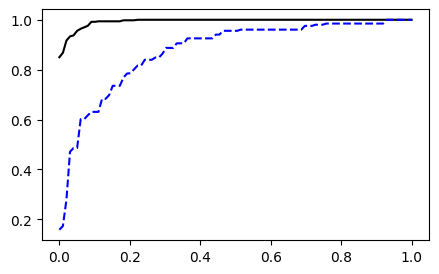

In [74]:
#plot ROC curve
from sklearn.metrics import roc_curve, auc
#เก็บข้อมูล FPR TPR ดีกว่าเพราะบอกโอกาส
fpr = dict() #flase positive rate
tpr = dict()
roc_auc = dict()
#กำหนด class
n_classes = 2
classes = ["nontoxic", "toxic"]
# Compute the ROC curve for each class
y_tr_proba = model.predict_proba(x_train_reduce)
y_cv_proba = cross_val_predict(model, x_train_reduce, y_train, cv=5, method='predict_proba')
y_te_proba = model.predict_proba(x_test_reduce)


for i in range(2):  # 2 classes
    fpr[i], tpr[i], _ = roc_curve(y_train, y_tr_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


# Compute average AUC across classes
average_auc = np.mean(list(roc_auc.values()))
# Compute average ROC curve
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(mean_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
mean_auc = auc(mean_fpr, mean_tpr)
fig = plt.figure(figsize=(5,3))
ax.set_aspect('equal', adjustable='box')
plt.plot(mean_fpr, mean_tpr, label='Training (AUC = %0.2f)' % mean_auc, linestyle='solid', color='black')

# Compute the ROC curve for each class - CV
for i in range(2):  #  2 classes
    fpr[i], tpr[i], _ = roc_curve(y_test, y_te_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
#for i in range(2):  # 2 classes
#    plt.plot(fpr[i], tpr[i], label='Test set: Class {} (AUC = {:0.2f})'.format(classes[i], roc_auc[i]))

# Compute average AUC across classes
average_auc = np.mean(list(roc_auc.values()))
# Compute average ROC curve
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(mean_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, label='Test (AUC = %0.2f)' % mean_auc, linestyle='dashed', color='blue')
